## Create dummy data and labels

In [1]:
import numpy as np   
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, rfft, rfftfreq, irfft, ifft

def generate_sine_wave(frequency, time_points):
    return np.sin((2 * np.pi) * time_points * frequency)

#### Create a Dummy signal

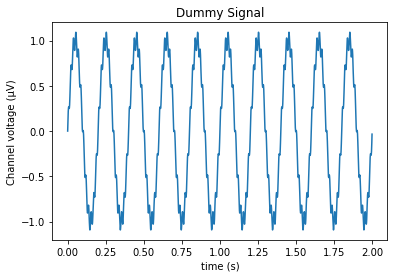

In [2]:
sample_rate = 2048  # frequency in Hertz
duration = 2        # Seconds
N_time_points = sample_rate * duration
time_points = np.linspace(0, duration, N_time_points, endpoint=False)

signal = generate_sine_wave(5, time_points)
noise = generate_sine_wave(60, time_points) * 0.1
# noise += generate_sine_wave(6000, time_points) * 0.01
# noise += generate_sine_wave(9000, time_points) 

wave = signal + noise

plt.title("Dummy Signal")
plt.xlabel("time (s)")
plt.ylabel("Channel voltage (\u03BCV)")
plt.plot(time_points, wave)
plt.show()


#### Create continuous Fourier Transform

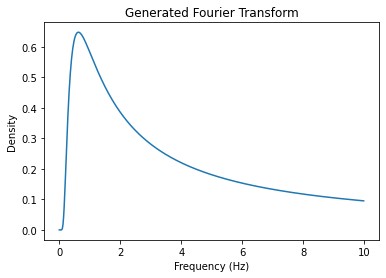

In [3]:
def generate_fourier_transform(f):
    f_temp = np.where(f == 0, 1e-2, f)
    return 1/(f_temp**2 * (np.exp(1/f_temp)-1))

frequency_sample_rate = 50
max_frequency = 10 
total_frequency_points = frequency_sample_rate * max_frequency
    
frequencies = np.linspace(0, max_frequency, max_frequency * frequency_sample_rate , endpoint=False)
frequency_density = generate_fourier_transform(frequencies)

plt.title("Generated Fourier Transform")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Density")
plt.plot(frequencies, frequency_density)
plt.show()


Inverse Fourier transform (Not Working Correctly)


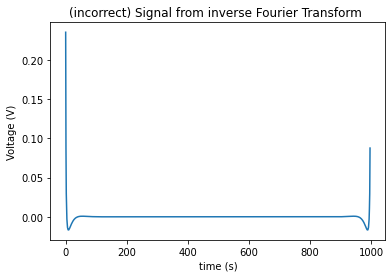

In [4]:
inverse_FT = irfft(frequency_density)

plt.title("(incorrect) Signal from inverse Fourier Transform ")
plt.xlabel("time (s)")
plt.ylabel("Voltage (V)")
plt.plot(inverse_FT)
plt.show()

#### Get a Frequency Probability Distribution from the Fourier Transform

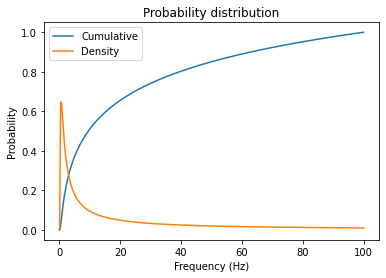

In [5]:
import numpy as np   
import matplotlib.pyplot as plt
import random

frequency_sample_rate = 500
max_frequency = 100
    
frequencies = np.linspace(0, max_frequency, max_frequency * frequency_sample_rate , endpoint=False)
frequency_density = generate_fourier_transform(frequencies)

cumulative = np.cumsum(frequency_density)
cumulative /= cumulative[-1]

plt.title("Probability distribution")
plt.xlabel("Frequency (Hz)")
plt.ylabel( "Probability")
plt.plot(frequencies, cumulative, label = "Cumulative")
plt.plot(frequencies, frequency_density/cumulative[-1], label = "Density")
plt.legend()
plt.show()


    

#### Get random frequencies from density distribution 

In [6]:
def get_frequency_from_density_distribution(frequencies, frequency_density):  
    '''
    "Get a frequency from a cumulative distribution: 
        1. Sum the array cumulatively and scale from 0 to 1
        2. Pick a random number between 0 and 1
        3. Accumulate the values starting from the beginning of the array until you are >= to a random value."

    Args:
    frequencies: 1D numpy array
        The considered frequencies as a linspace.
        
    frequency_density: 1D numpy array
        The density probability distribution
    '''

    cumulative = np.cumsum(frequency_density)
    cumulative /= cumulative[-1]      
    random_value = random.random()
    for i, cum_value in enumerate(cumulative):
        if(cum_value >= random_value):
            return frequencies[i]
    return frequency_density[i]

print("Random Frequencies from Distribution:")

for i in range(5):
    print(f'{get_frequency_from_density_distribution(frequencies, frequency_density):.3f}')


Random Frequencies from Distribution:
0.450
49.072
24.760
7.704
0.586


#### Create signals from random frequencies

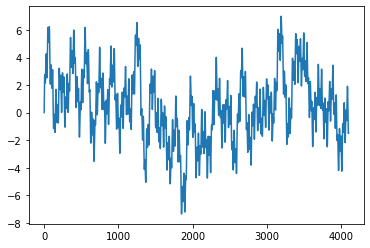

In [7]:
sig = np.zeros(N_time_points)

for i in range(10):
    freq = get_frequency_from_density_distribution(frequencies, frequency_density)
    sig += generate_sine_wave(freq, time_points)

plt.plot(sig)